# Elementary Python Colab Tutorial

---

# We are going to cover the following:

*  ## How to set up the google drive account as a virtual drive.
* ##  How to import data/files from our local drive to google drive.
* ##  How to read files from google drive in colab.
* ##  How to visualize data using pandas.
* ##  How to download files from colab. 
* ##  How to do some elementary operations in python using numpy.
* ##  How to plot a function in python. 
---


# Datasets

## Link to datasets and a copy of this colab file in my github repository: 
https://github.com/aghababa/Elementary-Python-Tutorial

One way to work with this Colab file is to clone the folder there and copy/paste its files into your google drive. 

In [ ]:
import numpy as np 
from scipy import linalg as LA
import pandas as pd
import random 
import matplotlib as mpl
import matplotlib.pyplot as plt 

# Importing files from google drive

---

# Mounting Google Drive
### We can access files in our google drive using mounting Google Drive, i.e., setting up the google drive account as a virtual drive. Thus we can access the resources of the drive like a local drive in our computer.

### To connect Google Drive with Colab, we can execute the following two lines of code in Colab:

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# The dataset we are going to use is a simple regression task data from kaggle which can be downloaded from this link: 
https://www.kaggle.com/luddarell/101-simple-linear-regressioncsv

---

# Importing data from your google drive, assuming data is copied/pasted there

## (I have pastaed Data.csv and Data1.csv files both in my google drive and in a folder named Python Tutorial in my google drive)

## Visualizing data in the form of dataframe (need "import pandas as pd")

#### The dataset is from kaggle: https://www.kaggle.com/mayanksrivastava/predict-housing-prices-simple-linear-regression

However we will not use this data. We just use it for introducing pandas dataframe which is great for visualization. And I'm using only 100 rows and some columns. 

In [ ]:
# if data is copied in google drive
pd.read_csv('/content/gdrive/My Drive/Data1.csv')[:5]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
#if data is in a folder in your goole drive, use the following
pd.read_csv('/content/gdrive/My Drive/Python Tutorial/Data.csv') 

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


# Importing data from your computer
#### To import data execute the following two lines of code in Colab and then choose your data by browsing "Choose Files" botton. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv


In [ ]:
pd.read_csv("Data1.csv")[:5]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,0,1987,0,98074,47.6168,-122.045


#Downloading Data from Colab into a Local Drive in Your Computer

We can download data into local directories by executing the following two lines of codes. Here we assume that the dataset is in CSV format.

In [ ]:
from google.colab import files

#if data is on the google drive
files.download('/content/gdrive/My Drive/Data.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#if data is in a folder in google drive, use the following
files.download('/content/gdrive/My Drive/Python Tutorial/Data1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# $\bf Regression$

### We are going to do a simple regression task in order to be familier with some basic operations and fuctions needed in this course.

#### The first function we need is reading a file like a csv file. 





In [ ]:
def read_file(file_name):
  data = []
  with open(file_name, "r") as f:
    for line in f:
      item = line.strip().split(",")
      data.append(np.array(item))
  return data

## Reading x and y values

In [ ]:
data = read_file('/content/gdrive/My Drive/Data.csv')[1:]

In [ ]:
len(data)

84

In [ ]:
data[0]

array(['1714', '2.4'], dtype='<U4')

In [ ]:
random.shuffle(data)
data = np.array(data)

In [ ]:
data[:5]

array([['1850', '3.38'],
       ['1712', '3.08'],
       ['2020', '3.28'],
       ['1850', '3.01'],
       ['1857', '3.41']], dtype='<U4')

In [ ]:
x_values = data[:,0]
y_values = data[:,1]

x_values[:5]

array(['1850', '1712', '2020', '1850', '1857'], dtype='<U4')

In [ ]:
x = np.zeros(len(x_values))
for i in range(len(x_values)):
  x[i] = float(x_values[i])

In [ ]:
x

array([1850., 1712., 2020., 1850., 1857., 1760., 1781., 1849., 1975.,
       1907., 1824., 2041., 2050., 1826., 1879., 1966., 1755., 1769.,
       1964., 1893., 1997., 1674., 1831., 1954., 2021., 1702., 2020.,
       1893., 1722., 1855., 1735., 1832., 1934., 1794., 1670., 1979.,
       1861., 1934., 1735., 1764., 1714., 1634., 1843., 1802., 1730.,
       1936., 1931., 1778., 1990., 1872., 1808., 1775., 1775., 1855.,
       1974., 1777., 1865., 1693., 1663., 1987., 1810., 1891., 1687.,
       1764., 1956., 1887., 1786., 1925., 1773., 1850., 1685., 1792.,
       1953., 1787., 1664., 2015., 1808., 1934., 1962., 1761., 1933.,
       1842., 1880., 1821.])

In [ ]:
y = np.zeros(len(y_values))
for i in range(len(y_values)):
  y[i] = float(y_values[i])

In [ ]:
y

array([3.38, 3.08, 3.28, 3.01, 3.41, 2.54, 3.47, 3.31, 3.6 , 3.42, 3.4 ,
       3.51, 3.81, 3.28, 3.44, 3.38, 3.17, 3.28, 3.49, 3.5 , 3.64, 3.17,
       3.37, 3.34, 3.61, 3.39, 3.65, 3.51, 3.19, 3.29, 3.08, 3.52, 3.54,
       3.28, 2.91, 3.41, 3.58, 3.28, 3.02, 3.  , 2.4 , 3.42, 3.71, 3.41,
       3.47, 3.71, 3.58, 3.59, 3.39, 3.17, 3.32, 3.07, 3.29, 3.42, 3.24,
       3.37, 3.37, 2.83, 3.2 , 3.73, 3.71, 3.48, 3.21, 3.  , 3.4 , 3.47,
       3.19, 3.4 , 3.12, 3.52, 2.74, 3.01, 3.47, 3.28, 2.52, 3.62, 3.49,
       3.6 , 3.76, 3.19, 3.59, 3.17, 3.29, 3.28])

## Train/Test split of data (75/25%)

In [ ]:
data_train = x[:63]
data_test = x[63:]

y_train = y[:63]
y_test = y[63:]

## Linear Regression
### Obtaining model parameters, i.e., $a$ and $b$ for the linear model $\ell(x) = a x + b$:



*   $x_{ave} = \overline{x} = \frac{1}{n} \sum_{i=1}^n x_i$, $\quad y_{ave} = \overline{y} = \frac{1}{n} \sum_{i=1}^n y_i$
*   $\overline{X} = (x_1-\overline{x}, \ldots, x_n-\overline{x})$, $\quad \overline{Y} = (y_1-\overline{y}, \ldots, y_n-\overline{y})$

*   $a = \langle \overline{X}, \overline{Y}\rangle/\|\overline{X}\|^2$, $\quad b = \overline{y} - a \cdot \overline{x}$.

In [ ]:
n = len(data_train)

x_ave = sum(data_train)/n
y_ave = sum(y_train)/n

X_bar = data_train - x_ave
Y_bar = y_train - y_ave

In [ ]:
a = np.dot(X_bar, Y_bar)/LA.norm(X_bar)**2
b = y_ave - a * x_ave

In [ ]:
a,b

(0.0013802767313911984, 0.7969418554612373)

## Calculating the residuals $r_i = y_i - \hat{y}_i$, where $\hat{y}_i = \ell(x_i) = ax_i+b$

In [ ]:
y_hat = np.zeros(21)

for i in range(21):
  y_hat[i] = a * data_test[i] + b

y_hat

array([3.23175001, 3.49676314, 3.40152405, 3.2621161 , 3.45397456,
       3.2441725 , 3.35045381, 3.12270815, 3.27039776, 3.49262231,
       3.26349637, 3.09372234, 3.57819947, 3.29248219, 3.46639705,
       3.5050448 , 3.22760918, 3.46501678, 3.33941159, 3.39186211,
       3.31042578])

In [ ]:
y_hat = a * data_test + b

y_hat

array([3.23175001, 3.49676314, 3.40152405, 3.2621161 , 3.45397456,
       3.2441725 , 3.35045381, 3.12270815, 3.27039776, 3.49262231,
       3.26349637, 3.09372234, 3.57819947, 3.29248219, 3.46639705,
       3.5050448 , 3.22760918, 3.46501678, 3.33941159, 3.39186211,
       3.31042578])

In [ ]:
r = y_test - y_hat #or y_hat - y_test

In [ ]:
r

array([-0.23175001, -0.09676314,  0.06847595, -0.0721161 , -0.05397456,
       -0.1241725 ,  0.16954619, -0.38270815, -0.26039776, -0.02262231,
        0.01650363, -0.57372234,  0.04180053,  0.19751781,  0.13360295,
        0.2549552 , -0.03760918,  0.12498322, -0.16941159, -0.10186211,
       -0.03042578])

# Plotting data and the Model

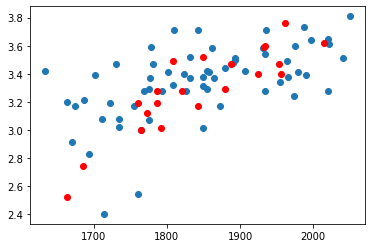

In [ ]:
plt.scatter(data_train, y_train);
plt.scatter(data_test, y_test, color = 'red');
plt.show()

$\ell(x) = ax + b$

In [ ]:
def lin_reg(x):
  return a * x + b

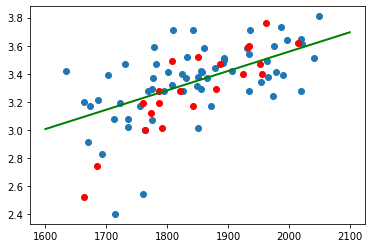

In [ ]:
plt.scatter(data_train, y_train);
plt.scatter(data_test, y_test, color = 'red');

xlist = np.linspace(1600, 2100, 200)
plt.plot(xlist, lin_reg(xlist), 'g', linewidth=2)

plt.show()

#Recap

## We covered the following:

*   How to set up the google drive account as a virtual drive.
*   How to import data/files from our local drive to google drive.
*   How to read files from google drive in colab.
*   How to visualize data using pandas.
*   How to download files from colab. 
*   How to do some elementary operations in python using numpy.
*   How to plot a function in python. 

